In [1]:
import sys
sys.path.append('/home/chujunyi/2_Program/1_code/3.1_multilabel')
from train_model_funcs import *
from skmultilearn.cluster.igraph import IGraphLabelGraphClusterer
import igraph as ig
from skmultilearn.cluster import MatrixLabelSpaceClusterer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
###
pwd = '/home/chujunyi/2_Program/2_output_file/2_multilabel/1_X_Y_data/'
filename = 'v2_NR_U_T_xy_np_rdkit_morgan_radius2.npz'
###
_, y, _ = read_data(pwd, filename, norm_idx = False, generate_lil = False) ###

Using TensorFlow backend.


In [248]:
nr_label_id = ['hsa10062', 'hsa190', 'hsa2099', 'hsa2100', 'hsa2101', 'hsa2103',
       'hsa2104', 'hsa2908', 'hsa3172', 'hsa3174', 'hsa367', 'hsa4306',
       'hsa5241', 'hsa5465', 'hsa5467', 'hsa5468', 'hsa5914', 'hsa5915',
       'hsa5916', 'hsa6095', 'hsa6096', 'hsa6097', 'hsa6256', 'hsa6257',
       'hsa6258', 'hsa7067', 'hsa7068', 'hsa7376', 'hsa7421', 'hsa8013',
       'hsa8856', 'hsa9970', 'hsa9971']

In [267]:
def construct_graph(y, weighted = True, include_self_edges = False, normalized_self_edges = False, method = 'fastgreedy', kmeans = False):
    graph_builder = LabelCooccurrenceGraphBuilder(weighted, include_self_edges, normalized_self_edges)
    graph_builder.transform(y)
    if not kmeans:
        clusterer = IGraphLabelGraphClusterer(graph_builder = graph_builder, method = method) ###
    else:
        clusterer = MatrixLabelSpaceClusterer(clusterer = KMeans(n_clusters = 4, random_state = 19961231))
    cluster_ = clusterer.fit_predict(_,y) ###
    
    
    edge_map = graph_builder.transform(y)
    
    if graph_builder.is_weighted:
        weights_ = dict(weight=list(edge_map.values()))
    else:
        weights_ = dict(weight=None)
        
    graph_ = ig.Graph(edges = [x for x in edge_map],
                      vertex_attrs = dict(name = list(range(1, y.shape[1] + 1))),
                      edge_attrs = weights_)
    
    return graph_, cluster_

In [170]:
graph_fg, cluster_fg = construct_graph(y, weighted = True, method = 'fastgreedy') # 结果稳定
graph_le, cluster_le = construct_graph(y, weighted = True, method = 'leading_eigenvector') # 结果稳定
graph_ml, cluster_ml = construct_graph(y, weighted = True, method = 'multilevel') # 结果稳定
graph_lp, cluster_lp = construct_graph(y, weighted = True, method = 'label_propagation') # 不稳定，每次结果都不一样
graph_im, cluster_im = construct_graph(y, weighted = True, method = 'infomap') # 结果稳定
graph_wt, cluster_wt = construct_graph(y, weighted = True, method = 'walktrap') # 结果稳定

print('=======fg=======\nnum_cluster = ', len(cluster_fg), '\n', cluster_fg)
print('=======le=======\nnum_cluster = ', len(cluster_le), '\n', cluster_le)
print('=======ml=======\nnum_cluster = ', len(cluster_ml), '\n', cluster_ml)
print('=======lp=======\nnum_cluster = ', len(cluster_lp), '\n', cluster_lp)
print('=======im=======\nnum_cluster = ', len(cluster_im), '\n', cluster_im)
print('=======wt=======\nnum_cluster = ', len(cluster_wt), '\n', cluster_wt)
plt.hist(graph_fg.es['weight'])

=======fg=======
num_cluster =  6 
 [list([0, 27]) list([1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 30, 31])
 list([8, 9, 13, 14, 15, 19, 28, 32])
 list([16, 17, 18, 20, 21, 22, 23, 24]) list([25, 26]) list([29])]
=======le=======
num_cluster =  4 
 [list([0, 27])
 list([1, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 32])
 list([29]) list([2, 3, 4, 5, 6, 7, 10, 11, 12, 30, 31])]
=======ml=======
num_cluster =  6 
 [list([0, 27]) list([1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 30, 31])
 list([8, 9, 13, 14, 15, 19, 28, 32])
 list([16, 17, 18, 20, 21, 22, 23, 24]) list([25, 26]) list([29])]
=======lp=======
num_cluster =  6 
 [list([0, 27]) list([1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 19, 28, 30, 31])
 list([8, 9, 13, 14, 15, 32]) list([16, 17, 18, 20, 21, 22, 23, 24])
 list([25, 26]) list([29])]
=======im=======
num_cluster =  7 
 [list([1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 30])
 list([16, 17, 18, 20, 21, 22, 23, 24]) list([8, 9, 13, 14, 15, 32])
 list([0, 27]) list([25, 26]) list([19, 28, 31])

(array([101.,  19.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

In [272]:
graph_kmeans, cluster_kmeans = construct_graph(y, weighted = True, kmeans = True)
cluster_kmeans

array([list([0, 1, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
       list([7]), list([2, 3]), list([10])], dtype=object)

In [171]:
# community_fg = graph_fg.community_fastgreedy(weights = graph_fg.es['weight']).as_clustering()
# community_lp = graph_lp.community_label_propagation(weights = graph_lp.es['weight'])
# community_le = graph_le.community_label_propagation(weights = graph_le.es['weight'])

In [347]:
ig.drawing.colors.known_colors.keys()

dict_keys(['alice blue', 'aliceblue', 'antique white', 'antiquewhite', 'antiquewhite1', 'antiquewhite2', 'antiquewhite3', 'antiquewhite4', 'aqua', 'aquamarine', 'aquamarine1', 'aquamarine2', 'aquamarine3', 'aquamarine4', 'azure', 'azure1', 'azure2', 'azure3', 'azure4', 'beige', 'bisque', 'bisque1', 'bisque2', 'bisque3', 'bisque4', 'black', 'blanched almond', 'blanchedalmond', 'blue', 'blue violet', 'blue1', 'blue2', 'blue3', 'blue4', 'blueviolet', 'brown', 'brown1', 'brown2', 'brown3', 'brown4', 'burlywood', 'burlywood1', 'burlywood2', 'burlywood3', 'burlywood4', 'cadet blue', 'cadetblue', 'cadetblue1', 'cadetblue2', 'cadetblue3', 'cadetblue4', 'chartreuse', 'chartreuse1', 'chartreuse2', 'chartreuse3', 'chartreuse4', 'chocolate', 'chocolate1', 'chocolate2', 'chocolate3', 'chocolate4', 'coral', 'coral1', 'coral2', 'coral3', 'coral4', 'cornflower blue', 'cornflowerblue', 'cornsilk', 'cornsilk1', 'cornsilk2', 'cornsilk3', 'cornsilk4', 'crimson', 'cyan', 'cyan1', 'cyan2', 'cyan3', 'cyan4',

In [172]:
def generate_vertex_color(y, cluster, color_list):
    vertex_color_list = [0] * y.shape[1]
    for idx, cluster_ in enumerate(cluster):
        for i in cluster_:
            vertex_color_list[i] = color_list[idx]
    return vertex_color_list

In [173]:
def generate_edge_color(graph_fg, edge_colors):
    edge_color_list, edge_width_list = [], []
    for w in graph_fg.es['weight']:
        if w == 1:
            edge_color_list.append(edge_colors[0])
            edge_width_list.append(0.5)
        elif w <= 5:
            edge_color_list.append(edge_colors[1])
            edge_width_list.append(1)
        elif w <= 10:
            edge_color_list.append(edge_colors[2])
            edge_width_list.append(1)
        elif w <= 15:
            edge_color_list.append(edge_colors[3])
            edge_width_list.append(1.5)
        elif w <= 20:
            edge_color_list.append(edge_colors[4])
            edge_width_list.append(1.5)
        elif w <= 25:
            edge_color_list.append(edge_colors[5])
            edge_width_list.append(1.5)
        else:
            edge_color_list.append(edge_colors[6])
            edge_width_list.append(2)
    return edge_color_list

In [182]:
vertex_colors = ['thistle', 'powderblue', 'wheat', 'light pink', 'aquamarine', 'light salmon', 'palegreen', 'khaki', 'bisque']
edge_colors = ['peachpuff', 'lightsalmon', 'coral', 'orangered', 'red', 'firebrick', 'maroon', 'black']

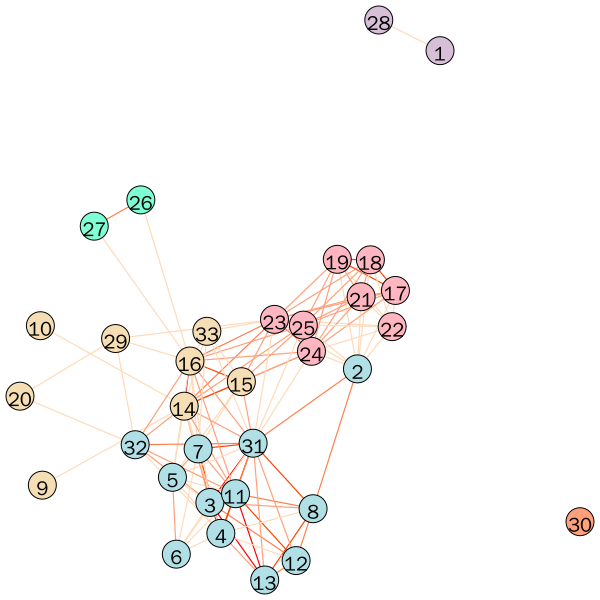

In [229]:
visual_style = {}
# visual_style['bbox'] = (300,300)
visual_style['layout'] = graph_fg.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_fg, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_fg.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_fg, edge_colors)

ig.drawing.plot(community_fg, target = './3_community_detection_graph/NR_T_fastgreedy.svg', ** visual_style)
ig.drawing.plot(community_fg, target = './3_community_detection_graph/NR_T_fastgreedy.pdf', ** visual_style)

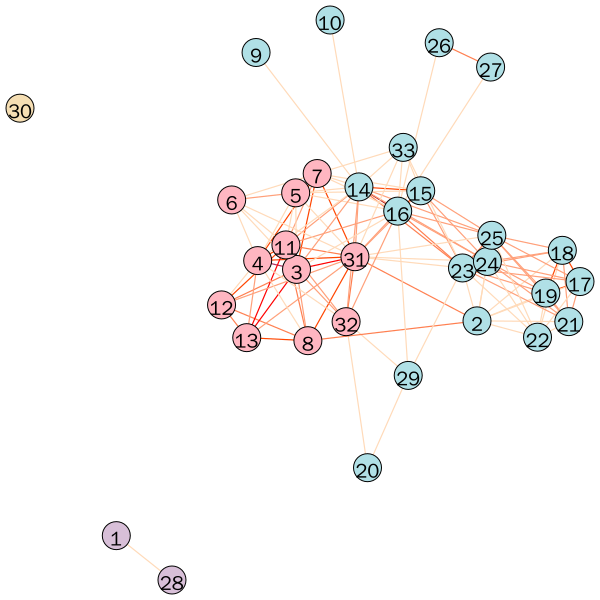

In [219]:
visual_style = {}
# visual_style['bbox'] = (200,200)
visual_style['layout'] = graph_le.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_le, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_le.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_le, edge_colors)

ig.drawing.plot(graph_le, target = './3_community_detection_graph/NR_T_leading_eigenvector.svg', ** visual_style)
ig.drawing.plot(graph_le, target = './3_community_detection_graph/NR_T_leading_eigenvector.pdf', ** visual_style)

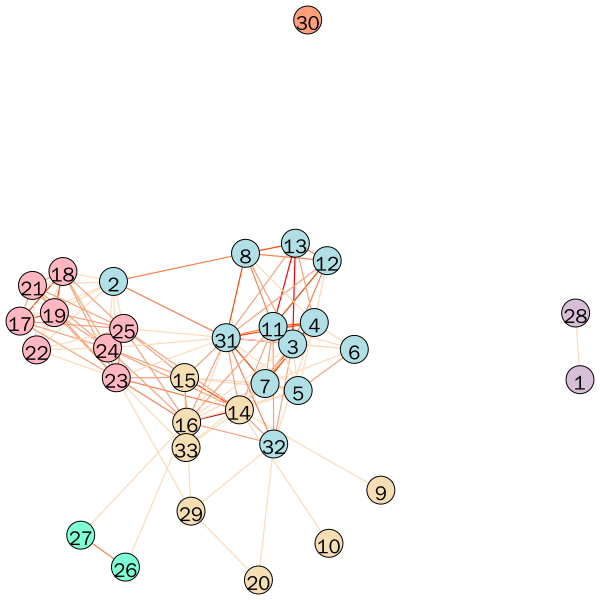

In [228]:
visual_style = {}
# visual_style['bbox'] = (200,200)
visual_style['layout'] = graph_ml.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_ml, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_ml.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_ml, edge_colors)

ig.drawing.plot(graph_ml, target = './3_community_detection_graph/NR_T_multilevel.svg', ** visual_style)
ig.drawing.plot(graph_ml, target = './3_community_detection_graph/NR_T_multilevel.pdf', ** visual_style)

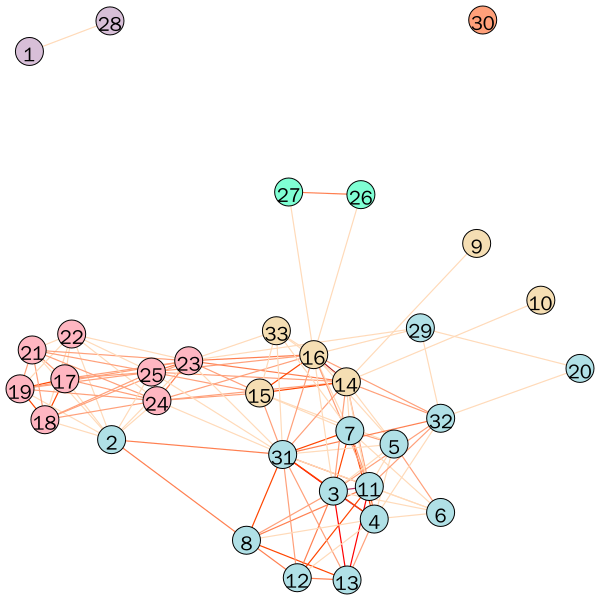

In [245]:
visual_style = {}
# visual_style['bbox'] = (200,200)
visual_style['layout'] = graph_lp.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_lp, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_lp.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_lp, edge_colors)

ig.drawing.plot(graph_lp, target = './3_community_detection_graph/NR_T_label_propogation.svg', ** visual_style)
ig.drawing.plot(graph_lp, target = './3_community_detection_graph/NR_T_label_propogation.pdf', ** visual_style)

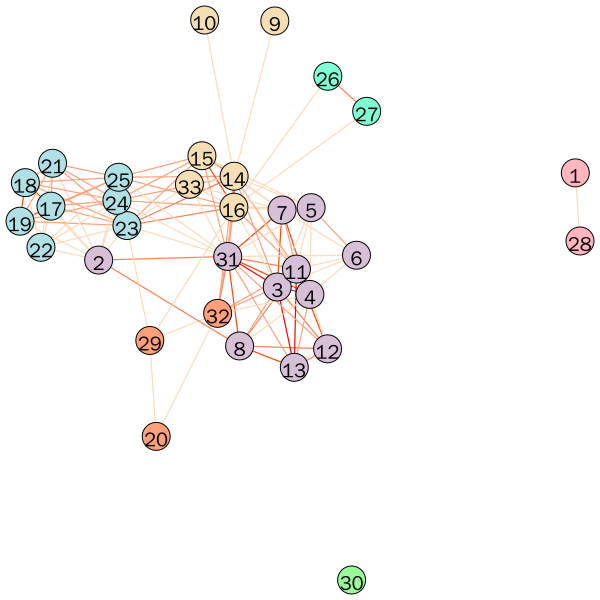

In [223]:
visual_style = {}
# visual_style['bbox'] = (200,200)
visual_style['layout'] = graph_im.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_im, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_im.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_im, edge_colors)

ig.drawing.plot(graph_im, target = './3_community_detection_graph/NR_T_infomap.svg', ** visual_style)
ig.drawing.plot(graph_im, target = './3_community_detection_graph/NR_T_infomap.pdf', ** visual_style)

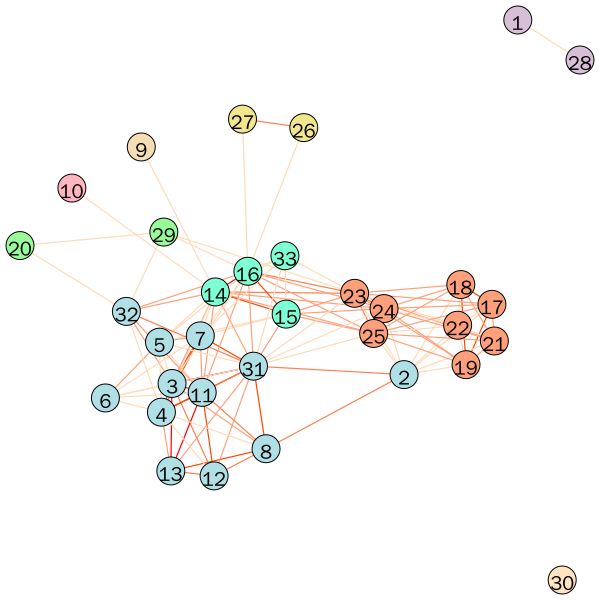

In [226]:
visual_style = {}
# visual_style['bbox'] = (200,200)
visual_style['layout'] = graph_wt.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_wt, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_wt.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_wt, edge_colors)

ig.drawing.plot(graph_wt, target = './3_community_detection_graph/NR_T_walktrap.svg', ** visual_style)
ig.drawing.plot(graph_wt, target = './3_community_detection_graph/NR_T_walktrap.pdf', ** visual_style)

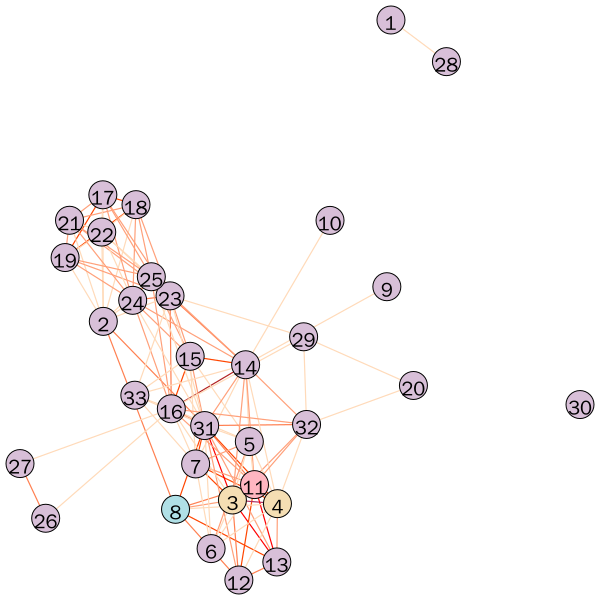

In [273]:
visual_style = {}
# visual_style['bbox'] = (300,300)
visual_style['layout'] = graph_kmeans.layout('fr') # grid_fr, fr, rt, kk

visual_style['vertex_size'] = 28
visual_style['vertex_color'] = generate_vertex_color(y, cluster_kmeans, vertex_colors) #ig.drawing.colors.palettes['terrain']
visual_style['vertex_label'] = graph_kmeans.vs['name']
visual_style['vertex_label_size'] = 20
visual_style['vertex_label_dist'] = 0
visual_style['vertex_label_angle'] = 0

visual_style['edge_curved'] = 0
visual_style['edge_width'] = 1.2 #edge_width_list # [w/5 for w in graph_w.es['weight']]
visual_style['edge_color'] = generate_edge_color(graph_kmeans, edge_colors)

ig.drawing.plot(community_fg, target = './3_community_detection_graph/NR_T_kmeans.svg', ** visual_style)
ig.drawing.plot(community_fg, target = './3_community_detection_graph/NR_T_kmeans.pdf', ** visual_style)

# GPCR...

In [257]:
def community_detection(pwd = '/home/chujunyi/2_Program/2_output_file/2_multilabel/1_X_Y_data/',
                        filename = 'GPCR_U_T_xy_np_rdkit_morgan_radius2.npz'):
    _, y, _ = read_data(pwd, filename, norm_idx = False, generate_lil = False) ###
    try:
        graph_fg, cluster_fg = construct_graph(y, weighted = True, method = 'fastgreedy') # 结果稳定
        print('=======fg=======\nnum_cluster = ', len(cluster_fg), '\n', cluster_fg)
    except:
        print('========fg FAILED========')
        graph_fg, cluster_fg = None, None
        
    try:
        graph_le, cluster_le = construct_graph(y, weighted = True, method = 'leading_eigenvector') # 结果稳定
        print('=======le=======\nnum_cluster = ', len(cluster_le), '\n', cluster_le)
    except:
        print('========le FAILED========')
        graph_le, cluster_le = None, None
        
    try:
        graph_ml, cluster_ml = construct_graph(y, weighted = True, method = 'multilevel') # 结果稳定
        print('=======ml=======\nnum_cluster = ', len(cluster_ml), '\n', cluster_ml)
    except:
        print('========ml FAILED========')
        graph_ml, cluster_ml = None, None
        
    try:
        graph_lp, cluster_lp = construct_graph(y, weighted = True, method = 'label_propagation') # 不稳定，每次结果都不一样
        print('=======lp=======\nnum_cluster = ', len(cluster_lp), '\n', cluster_lp)
    except:
        print('========lp FAILED========')
        graph_lp, cluster_lp = None, None
        
    try:
        graph_im, cluster_im = construct_graph(y, weighted = True, method = 'infomap') # 结果稳定
        print('=======im=======\nnum_cluster = ', len(cluster_im), '\n', cluster_im)
    except:
        print('========im FAILED========')
        graph_im, cluster_im = None, None
    
    try:
        graph_wt, cluster_wt = construct_graph(y, weighted = True, method = 'walktrap') # 结果稳定
        print('=======wt=======\nnum_cluster = ', len(cluster_wt), '\n', cluster_wt)
    except:
        print('========wt FAILED========')
        graph_wt, cluster_wt = None, None

    print('=======num_weight=======\n', plt.hist(graph_fg.es['weight']))
    return graph_fg, cluster_fg,\
            graph_le, cluster_le,\
            graph_ml, cluster_ml,\
            graph_lp, cluster_lp,\
            graph_im, cluster_im,\
            graph_wt, cluster_wt

In [258]:
gpcr_graph_fg, gpcr_cluster_fg,\
gpcr_graph_le, gpcr_cluster_le,\
gpcr_graph_ml, gpcr_cluster_ml,\
gpcr_graph_lp, gpcr_cluster_lp,\
gpcr_graph_im, gpcr_cluster_im,\
gpcr_graph_wt, gpcr_cluster_wt = community_detection(pwd = '/home/chujunyi/2_Program/2_output_file/2_multilabel/1_X_Y_data/',
                                                     filename = 'GPCR_U_T_xy_np_rdkit_morgan_radius2.npz')

=======fg=======
num_cluster =  44 
 [list([0, 16, 17, 18, 20, 21, 23, 49, 54, 55, 56, 87, 88, 89, 100, 101, 102, 103, 105, 106, 107, 108, 109, 127, 131, 137, 153, 155])
 list([1]) list([2, 3, 4, 144])
 list([5, 7, 15, 47, 115, 117, 119, 120, 121, 122, 123, 124, 125, 139])
 list([6])
 list([8, 34, 35, 36, 37, 38, 48, 57, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 118, 126, 148])
 list([9, 10, 11, 12, 13, 59]) list([14, 142])
 list([19, 24, 25, 26, 27, 28, 30, 31, 32, 33]) list([22]) list([29])
 list([39, 40]) list([41, 42, 111, 147, 154]) list([43, 44]) list([45])
 list([46]) list([50]) list([51]) list([52]) list([53, 90]) list([58])
 list([60]) list([61]) list([62, 63, 64, 65, 66, 67, 68, 69])
 list([70, 71]) list([91, 92, 93, 94, 95]) list([96, 97]) list([98])
 list([99]) list([104, 112, 113, 114]) list([110]) list([116]) list([128])
 list([129]) list([130]) list([132, 133, 134, 135, 136]) list([138])
 list([140]) list([141]) list([143]) list([145, 146]) list([149, 1

In [261]:
ic_graph_fg, ic_cluster_fg,\
ic_graph_le, ic_cluster_le,\
ic_graph_ml, ic_cluster_ml,\
ic_graph_lp, ic_cluster_lp,\
ic_graph_im, ic_cluster_im,\
ic_graph_wt, ic_cluster_wt = community_detection(pwd = '/home/chujunyi/2_Program/2_output_file/2_multilabel/1_X_Y_data/',
                                                     filename = 'IC_U_T_xy_np_rdkit_morgan_radius2.npz')

=======fg=======
num_cluster =  9 
 [list([0, 2, 3, 4, 5, 6, 28, 29, 30, 35, 36, 37, 55, 56, 57, 58, 59, 60, 61, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 156, 159, 160, 161, 164, 165, 166, 167, 168, 169, 171, 172, 173, 195, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 220, 221, 222, 224, 225, 226, 227, 228, 230, 231, 233, 234, 235, 237])
 list([1, 84, 170]) list([7, 194])
 list([8, 108, 125, 139, 140, 143, 149, 154, 157, 163, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 197, 219, 232])
 list([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 31, 32, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 155, 162, 191, 192

In [262]:
e_graph_fg, e_cluster_fg,\
e_graph_le, e_cluster_le,\
e_graph_ml, e_cluster_ml,\
e_graph_lp, e_cluster_lp,\
e_graph_im, e_cluster_im,\
e_graph_wt, e_cluster_wt = community_detection(pwd = '/home/chujunyi/2_Program/2_output_file/2_multilabel/1_X_Y_data/',
                                                     filename = 'E_U_T_xy_np_rdkit_morgan_radius2.npz')

=======fg=======
num_cluster =  67 
 [list([0, 3, 5, 15, 29, 35, 38, 46, 49, 53, 56, 61, 62, 63, 69, 71, 83, 85, 87, 92, 98, 99, 102, 104, 105, 108, 111, 112, 113, 119, 131, 135, 136, 140, 141, 144, 146, 152, 155, 171, 172, 180, 220, 227, 229, 233, 234, 240, 241, 243, 244, 249, 250, 252, 270, 271, 273, 274, 279, 281, 302, 310, 314, 316, 319, 320, 322, 323, 324, 326, 328, 330, 332, 337, 340, 341, 345, 364, 384, 397, 398, 399, 400, 402, 403, 405, 409, 417, 419, 425, 433, 435, 436, 438, 463, 467, 469, 470, 471, 480, 482, 483, 503, 506, 507, 526, 533, 535, 536, 541, 544, 545, 551, 553, 555, 556, 560, 562, 565, 566, 569, 570, 571, 572, 583, 584, 585, 586, 588, 589, 593, 598, 599, 613, 617, 621, 626, 628, 631, 632, 633, 638, 639, 640, 641, 643, 645, 648, 662, 663, 664, 665, 666, 672, 681, 688, 698, 700, 702, 706, 707, 712, 713, 716, 717, 718, 719, 720, 721, 727, 731, 732, 734, 735, 736, 737, 738, 748, 749, 773, 776, 779, 782, 784, 785, 786, 793, 794, 806, 822, 826, 840, 841, 852, 855, 857, 8

=======ml=======
num_cluster =  63 
 [list([0, 15, 38, 40, 53, 61, 62, 69, 71, 72, 83, 85, 87, 92, 102, 104, 111, 113, 131, 132, 135, 136, 140, 141, 146, 164, 171, 178, 180, 220, 223, 228, 233, 234, 240, 241, 242, 243, 244, 245, 249, 250, 258, 271, 273, 274, 279, 283, 295, 314, 319, 320, 324, 326, 330, 332, 337, 338, 341, 364, 372, 381, 384, 385, 386, 419, 423, 425, 433, 435, 438, 440, 443, 445, 450, 455, 459, 468, 469, 470, 471, 472, 474, 482, 506, 526, 533, 535, 536, 544, 549, 553, 554, 555, 556, 560, 562, 565, 566, 567, 568, 569, 570, 571, 572, 577, 583, 584, 585, 588, 589, 598, 599, 607, 613, 631, 632, 633, 662, 663, 665, 666, 698, 713, 715, 716, 717, 718, 719, 720, 721, 731, 732, 734, 735, 736, 737, 738, 749, 751, 773, 776, 793, 794, 799, 806, 810, 820, 841, 855, 857, 858, 860, 862, 863, 869, 873, 874, 924, 927, 943, 953, 957, 967, 976, 1002, 1041, 1053, 1077, 1079, 1080, 1085, 1091, 1097, 1103, 1111, 1124, 1125, 1127, 1132, 1147, 1165, 1166, 1199, 1202, 1205, 1208, 1220, 1236, 12

=======im=======
num_cluster =  109 
 [list([4, 8, 9, 13, 18, 19, 30, 34, 41, 48, 52, 57, 58, 60, 78, 86, 88, 90, 91, 93, 95, 106, 122, 123, 124, 126, 138, 145, 161, 167, 168, 169, 170, 173, 174, 176, 181, 183, 224, 225, 235, 237, 268, 272, 275, 280, 282, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 296, 297, 298, 301, 305, 318, 325, 342, 343, 344, 346, 347, 348, 349, 350, 354, 355, 358, 359, 361, 366, 367, 368, 371, 374, 390, 393, 396, 401, 404, 406, 410, 413, 418, 428, 451, 456, 458, 465, 466, 490, 491, 500, 502, 504, 505, 527, 539, 578, 580, 587, 593, 602, 603, 604, 605, 608, 609, 610, 616, 618, 624, 625, 629, 636, 637, 649, 650, 655, 656, 660, 661, 667, 668, 669, 671, 678, 679, 680, 705, 710, 724, 726, 739, 740, 741, 762, 763, 764, 765, 766, 767, 783, 789, 790, 791, 803, 807, 818, 819, 824, 851, 854, 867, 871, 872, 881, 883, 884, 888, 889, 890, 891, 910, 913, 938, 951, 979, 986, 988, 989, 991, 992, 993, 997, 999, 1000, 1001, 1003, 1005, 1006, 1007, 1008, 1010, 1011, 1015,

=======wt=======
num_cluster =  140 
 [list([0, 15, 38, 53, 61, 62, 69, 71, 72, 83, 85, 87, 92, 102, 104, 111, 113, 131, 135, 136, 140, 141, 146, 171, 180, 220, 233, 234, 240, 241, 243, 244, 249, 250, 252, 271, 273, 274, 314, 319, 320, 326, 330, 332, 337, 341, 364, 384, 419, 425, 435, 438, 469, 470, 471, 482, 506, 526, 533, 535, 536, 553, 555, 556, 560, 565, 566, 567, 568, 569, 570, 571, 572, 583, 584, 585, 588, 589, 598, 599, 613, 631, 632, 633, 662, 663, 665, 666, 698, 713, 715, 716, 717, 718, 719, 720, 721, 727, 732, 734, 735, 736, 737, 738, 749, 773, 776, 793, 794, 806, 840, 841, 855, 857, 858, 953, 1002, 1077, 1079, 1085, 1091, 1103, 1111, 1124, 1127, 1132, 1147, 1199, 1205, 1208, 1238, 1241, 1291, 1316, 1318, 1339, 1352, 1368, 1370, 1371, 1393])
 list([1, 153, 166, 461, 486, 606, 677, 774, 1095, 1096, 1112, 1214, 1410])
 list([2, 299, 300])
 list([3, 5, 35, 56, 105, 152, 155, 162, 281, 310, 316, 340, 345, 398, 405, 409, 483, 503, 507, 541, 542, 586, 621, 664, 672, 688, 700, 702, 

In [263]:
v2_e_graph_fg, v2_e_cluster_fg,\
v2_e_graph_le, v2_e_cluster_le,\
v2_e_graph_ml, v2_e_cluster_ml,\
v2_e_graph_lp, v2_e_cluster_lp,\
v2_e_graph_im, v2_e_cluster_im,\
v2_e_graph_wt, v2_e_cluster_wt = community_detection(pwd = '/home/chujunyi/2_Program/2_output_file/2_multilabel/1_X_Y_data/',
                                                     filename = 'v2_E_U_T_xy_np_rdkit_morgan_radius2.npz')

=======fg=======
num_cluster =  65 
 [list([0, 3, 4, 9, 22, 24, 26, 29, 31, 33, 36, 37, 38, 44, 45, 53, 54, 56, 57, 61, 62, 64, 67, 68, 69, 74, 75, 76, 79, 80, 83, 84, 90, 91, 101, 107, 141, 144, 145, 149, 150, 153, 154, 156, 161, 162, 164, 182, 183, 185, 186, 190, 191, 209, 217, 221, 223, 226, 227, 228, 230, 231, 232, 235, 237, 238, 242, 254, 269, 276, 277, 278, 279, 281, 282, 284, 287, 298, 303, 305, 306, 308, 321, 323, 324, 325, 326, 331, 333, 350, 352, 353, 364, 369, 370, 371, 374, 377, 382, 383, 384, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 404, 405, 406, 407, 409, 417, 418, 428, 431, 435, 438, 440, 441, 442, 443, 447, 448, 449, 451, 453, 463, 464, 465, 466, 467, 471, 472, 478, 483, 484, 486, 488, 489, 492, 493, 494, 495, 496, 497, 498, 499, 500, 506, 507, 509, 510, 511, 512, 513, 520, 521, 542, 544, 545, 546, 549, 552, 567, 582, 590, 593, 595, 596, 597, 605, 608, 614, 615, 616, 617, 618, 619, 629, 631, 633, 634, 635, 637, 638, 641, 642, 647, 660, 661, 682, 686, 711, 715,

=======ml=======
num_cluster =  62 
 [list([0, 9, 24, 31, 36, 37, 44, 45, 53, 54, 56, 57, 64, 67, 69, 74, 75, 76, 79, 80, 84, 107, 141, 149, 150, 153, 154, 156, 161, 162, 183, 185, 186, 190, 221, 226, 227, 230, 231, 232, 235, 238, 254, 269, 298, 303, 305, 308, 324, 325, 326, 333, 352, 364, 369, 370, 371, 382, 383, 384, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 404, 405, 406, 409, 417, 418, 428, 441, 442, 443, 463, 464, 466, 467, 483, 493, 494, 495, 496, 497, 498, 499, 500, 506, 507, 509, 510, 511, 512, 513, 521, 542, 544, 552, 582, 593, 595, 596, 597, 682, 715, 728, 730, 735, 740, 748, 755, 761, 763, 776, 789, 813, 818, 821, 839, 841, 878, 880, 886, 901, 911])
 list([1, 19, 21, 26, 28, 40, 49, 61, 62, 66, 72, 85, 86, 103, 143, 144, 148, 151, 155, 157, 167, 170, 181, 203, 211, 213, 260, 266, 267, 270, 271, 272, 290, 291, 292, 295, 296, 297, 299, 300, 304, 307, 311, 316, 318, 319, 320, 322, 327, 328, 330, 331, 332, 336, 341, 365, 376, 380, 386, 399, 410, 413, 436, 437, 440, 456, 

=======im=======
num_cluster =  88 
 [list([10, 11, 12, 13, 14, 15, 17, 18, 25, 34, 55, 71, 98, 99, 100, 102, 104, 108, 180, 184, 187, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 212, 225, 229, 239, 240, 241, 243, 244, 245, 246, 247, 255, 256, 259, 275, 280, 283, 285, 288, 313, 339, 340, 351, 372, 408, 412, 421, 422, 423, 424, 425, 426, 430, 432, 439, 446, 454, 455, 462, 468, 470, 491, 503, 532, 533, 534, 535, 536, 537, 589, 592, 601, 603, 611, 612, 613, 630, 643, 645, 672, 673, 674, 679, 680, 681, 683, 684, 685, 687, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 720, 721, 722, 737, 742, 744, 745, 746, 747, 751, 753, 770, 771, 778, 782, 783, 786, 787, 790, 794, 795, 796, 798, 799, 801, 814, 816, 819, 823, 825, 826, 837, 846, 854, 857, 858, 870, 875, 892, 895, 896, 900, 908, 913, 917])
 list([0, 9, 24, 31, 36, 37, 44, 45, 53, 54, 56, 57, 64, 67, 69, 74, 75, 76, 79, 80, 84, 107, 141, 149, 150, 153, 154, 156, 161, 162, 183, 185, 186, 